 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [5]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [6]:
# Set the file paths
whale_data = Path("/Users/eyva/Desktop/Repos/Portfolio_perfomance_assessment/Resources/whale_returns.csv")

# Reading whale returns
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows
whale_df.head(2)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569


In [7]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Drop nulls
whale_df = whale_df.dropna()

In [9]:
# Validate nulls have been dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [10]:
# Set the file paths
algo_data = Path("/Users/eyva/Desktop/Repos/Portfolio_perfomance_assessment/Resources/algo_returns.csv")

# Reading algorithmic daily returns
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows
algo_df.head(2)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN


In [11]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop nulls
algo_df = algo_df.dropna()

In [13]:
# Validate nulls have been dropped
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Set the file paths
sp500_data = Path("/Users/eyva/Desktop/Repos/Portfolio_perfomance_assessment/Resources/sp500_history.csv")

# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows
sp500_df.head(2)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97


In [15]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [16]:
# Fix Data Types
# Clean identified numeric fields with $ symbol
sp500_df["Close"] = sp500_df["Close"].str.replace('$', "", regex=True)
sp500_df["Close"]

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [17]:
# Cast "Close" Series as float
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df['Close'].dtype

dtype('float64')

In [18]:
# Retrieve data types to confirm what needs to be converted
sp500_df.dtypes

Close    float64
dtype: object

In [19]:
# Calculate Daily Returns
daily_returns = sp500_df.pct_change()
daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [20]:
# Drop nulls
daily_returns = daily_returns.dropna()

In [21]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns={
    "Close": "S&P TSX"
})

daily_returns.head()

,S&P TSX
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [22]:
daily_df = daily_returns
daily_df.head()

,S&P TSX
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [23]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# Create a new pivot table
combined_df = pd.concat([whale_df, algo_df, daily_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Display a few rows
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

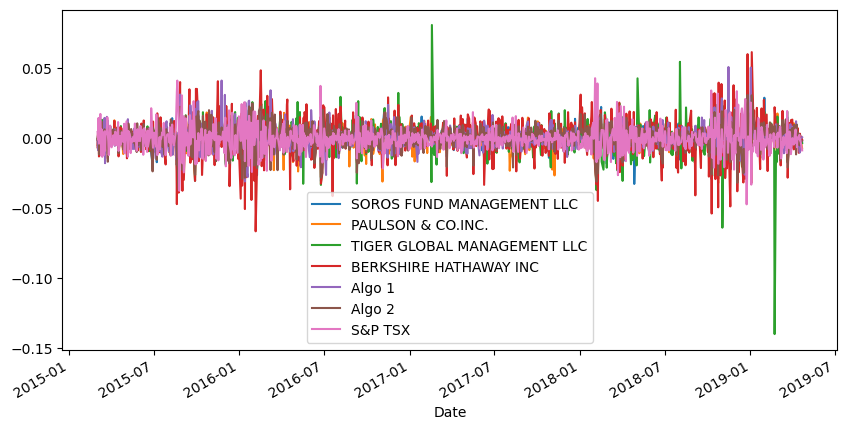

In [24]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative returns for all portfolios'}, xlabel='Date'>

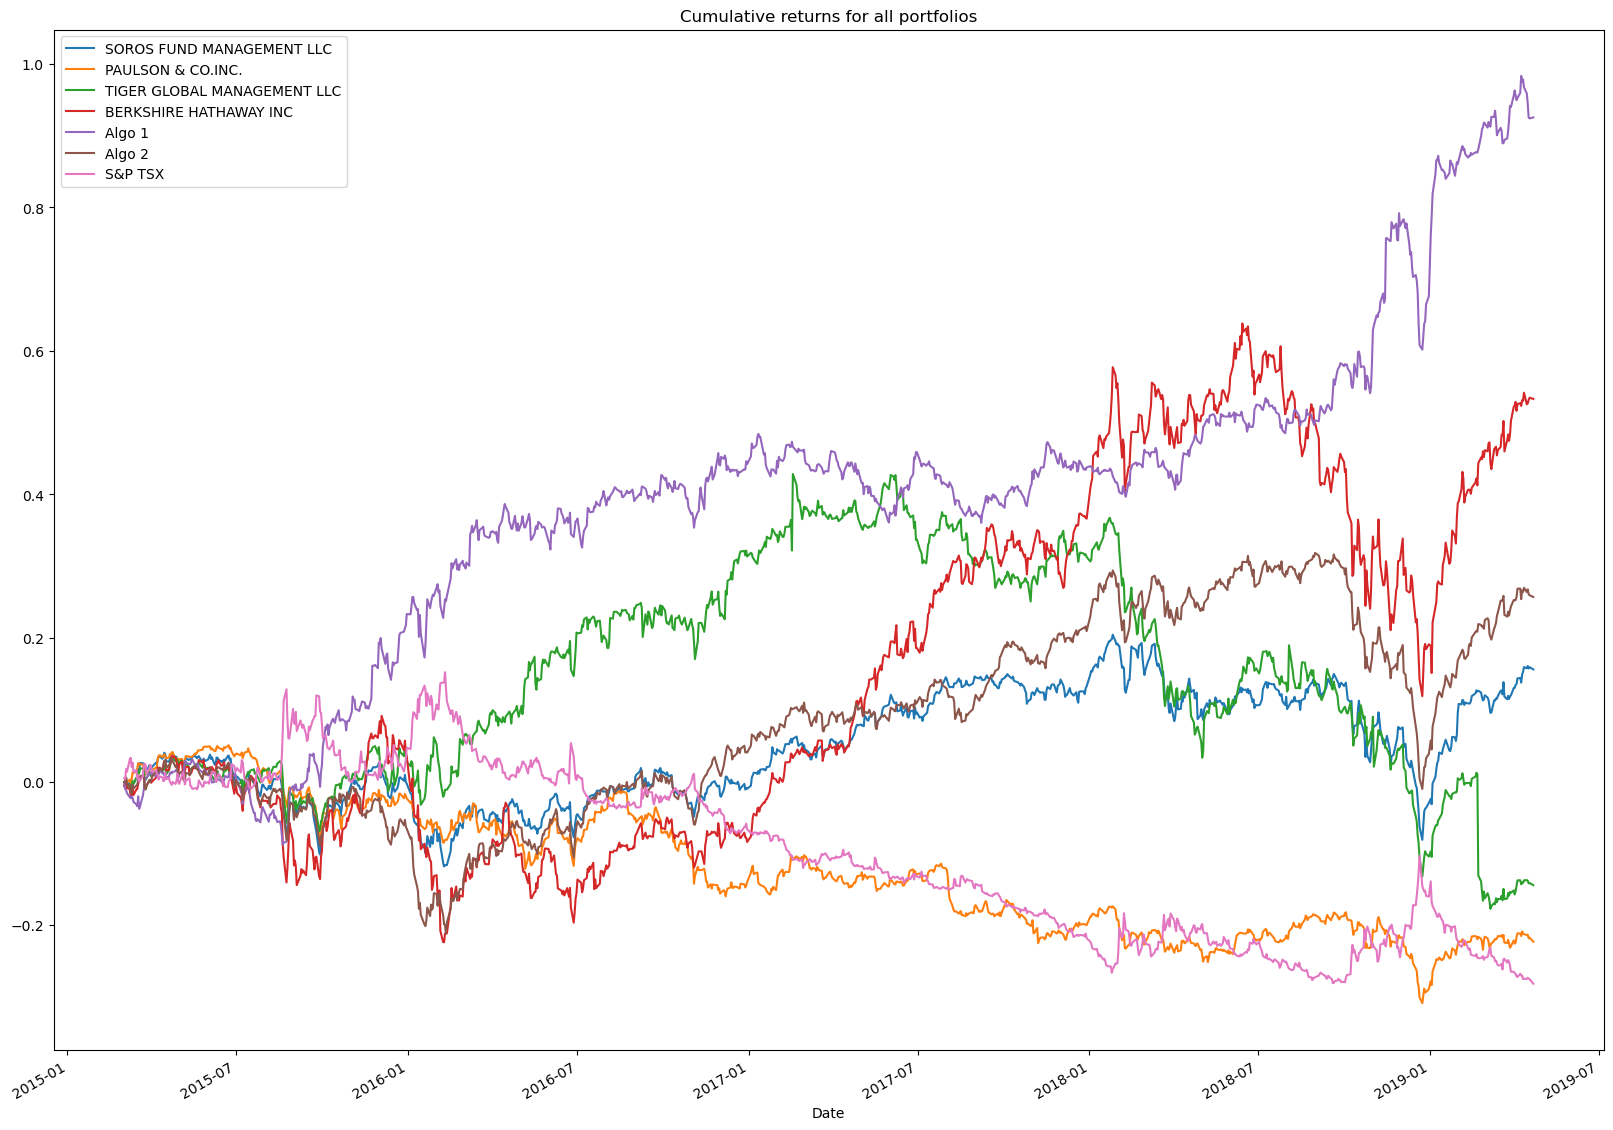

In [25]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,15), title="Cumulative returns for all portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

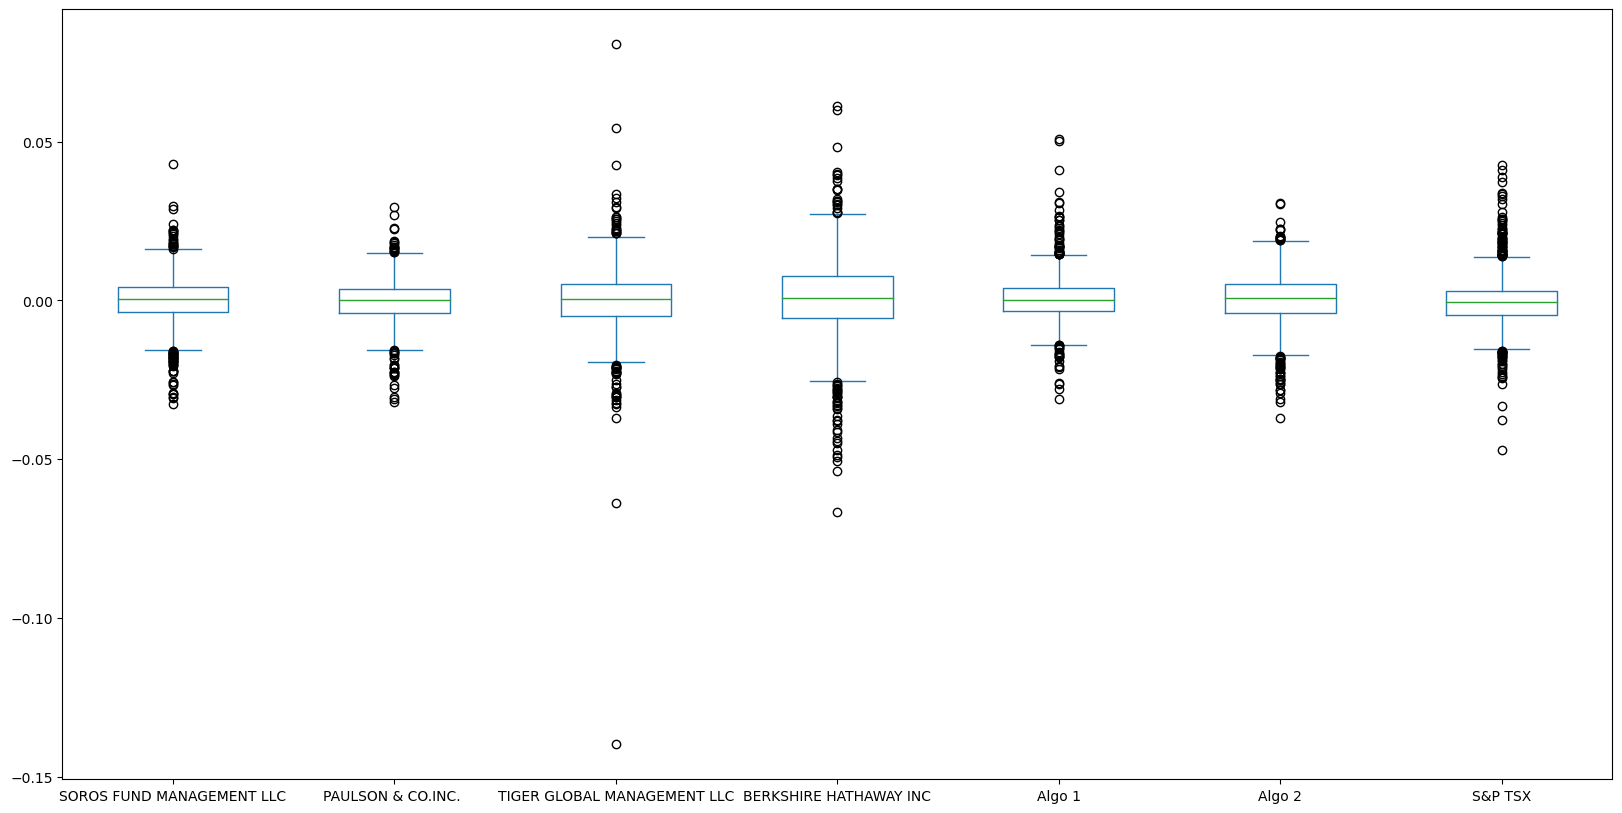

In [26]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10))

<Axes: >

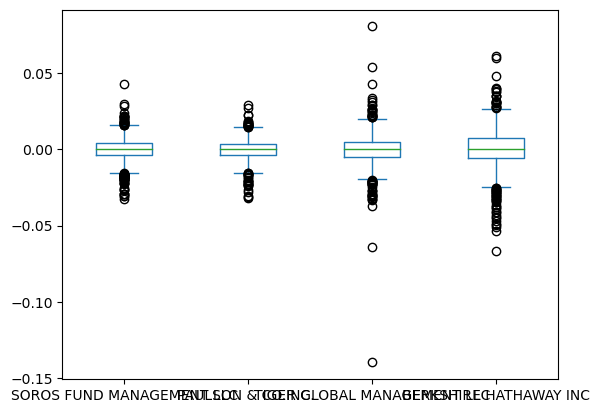

In [27]:
whale_df.plot.box()

<Axes: >

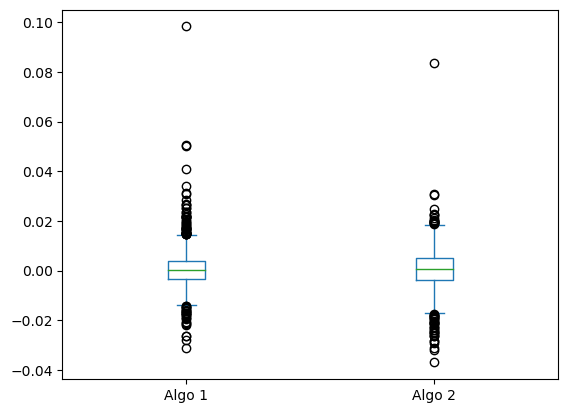

In [28]:
algo_df.plot.box()

<Axes: >

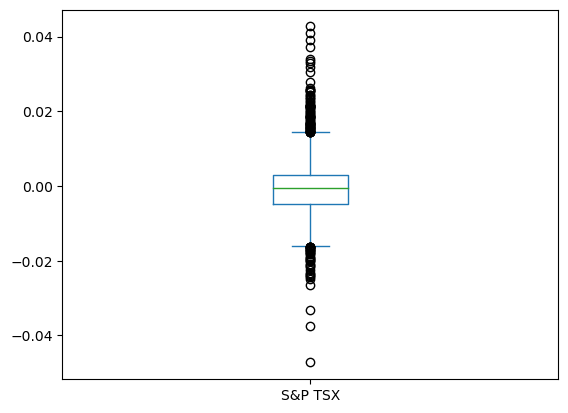

In [29]:
daily_df.plot.box()

### Calculate Standard Deviations

In [30]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = combined_df.std()

# Identify the stock with the most risk
all_portfolio_std = all_portfolio_std.sort_values(ascending=False)
all_portfolio_std.head(7)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P TSX                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

##### BERKSHIRE HATHAWAY INC's daily standard deviation is higher than the other stocks. This means that BERKSHIRE HATHAWAY INC's daily price changes are more volatile than the other stocks. Therefore, the riskiest stock is BERKSHIRE HATHAWAY INC.

### Determine which portfolios are riskier than the S&P 500

In [31]:
# Calculate  the daily standard deviation of S&P 500
combined_df['S&P TSX'].std()

0.00858688974707399

In [32]:
# Determine which portfolios are riskier than the S&P 500
combined_df.std() > combined_df['S&P TSX'].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P TSX                        False
dtype: bool

##### TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than S&P 500

### Calculate the Annualized Standard Deviation

In [33]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_portfolio_std * np.sqrt(252)
annualized_std.head(7)

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P TSX                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

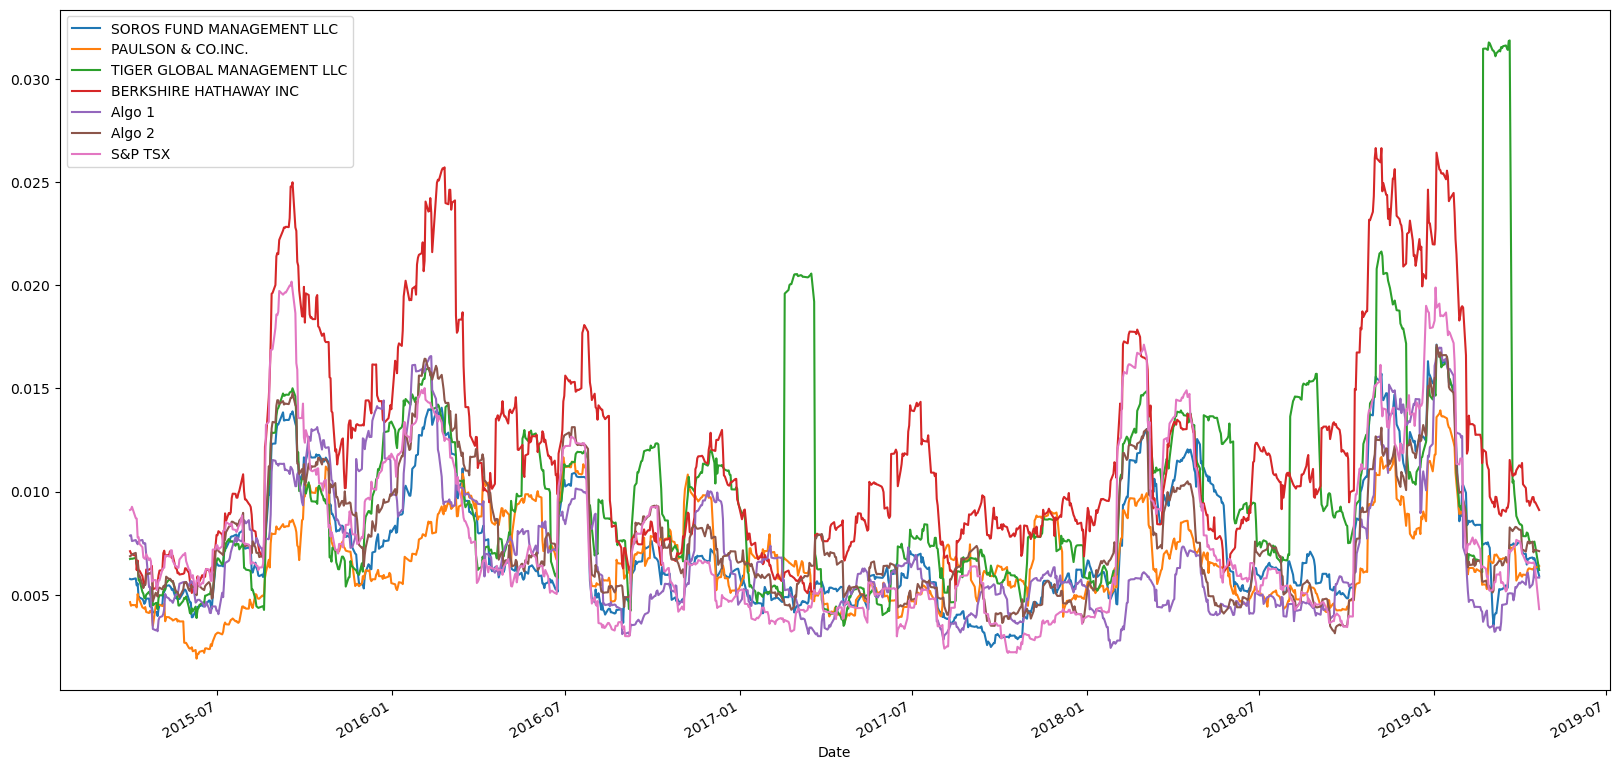

In [34]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df_rolling_21 = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
combined_df_rolling_21.plot(figsize=(20,10))

### Calculate and plot the correlation

In [35]:
# Calculate the correlation
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P TSX,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<Axes: >

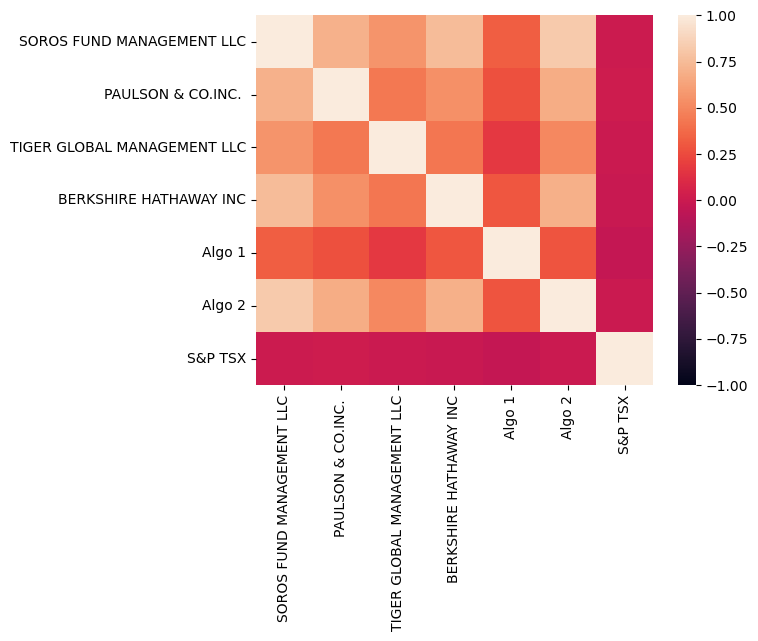

In [36]:
# Correlation matrix display 
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

##### The highest positive correlation is only 0.013549, which is between Paulson & Co. Inc. and the S&P 500

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Rolling 60-Day Covariance of SOROS FUND MANAGEMENT LLC Returns vs. S&P 500 Returns'}, xlabel='Date'>

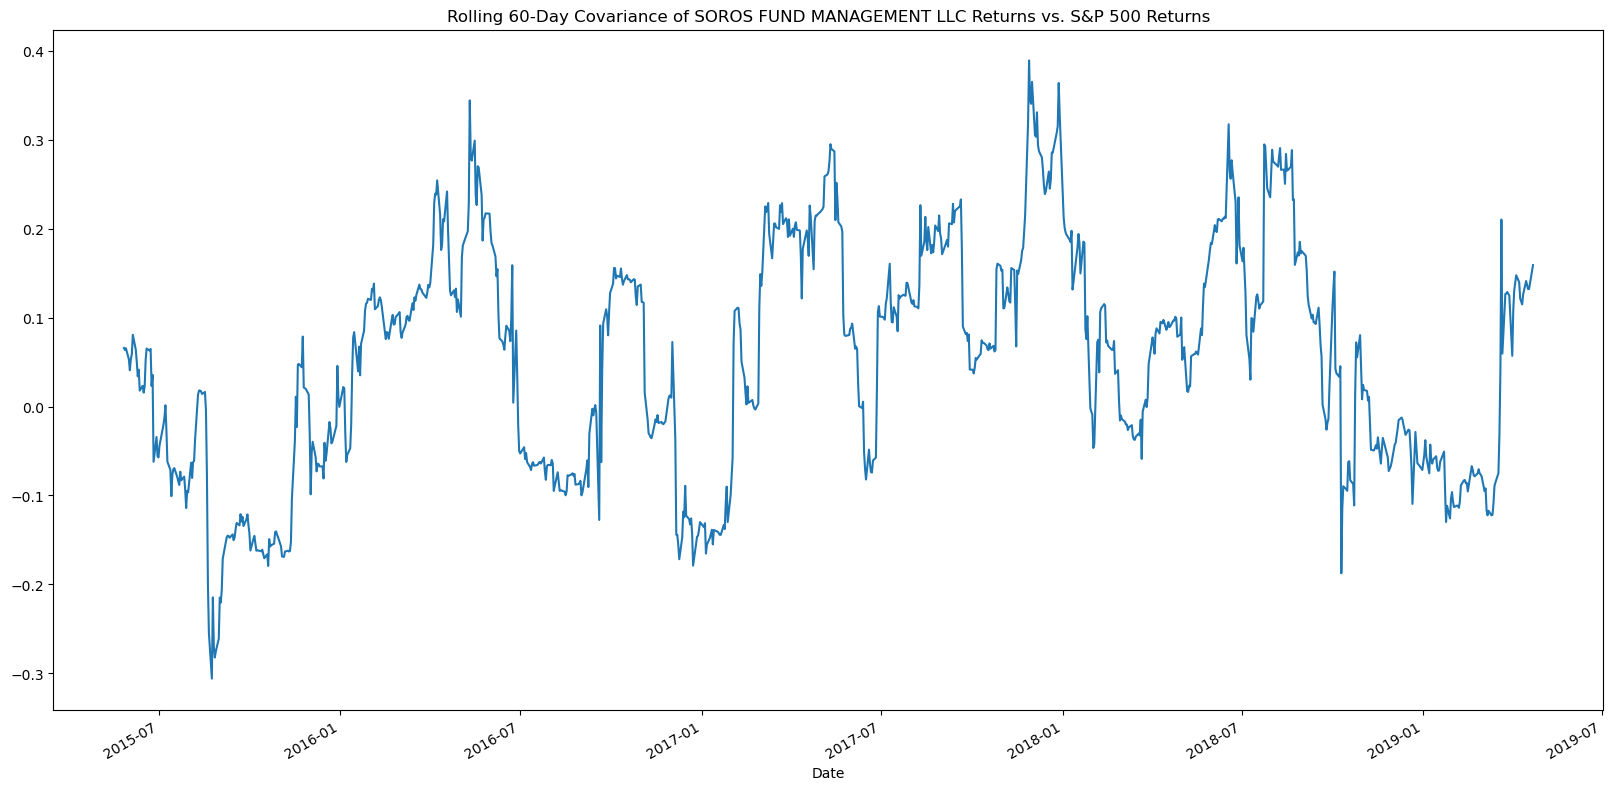

In [37]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P TSX'])

# Calculate variance of S&P 500
rolling_variance = combined_df['S&P TSX'].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20,10), title='Rolling 60-Day Covariance of SOROS FUND MANAGEMENT LLC Returns vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [38]:
ewm = combined_df.ewm(halflife=21).mean()
ewm

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,0.001560
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,0.005975
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,0.003375
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,0.006337
...,...,...,...,...,...,...,...
2019-04-15,0.001439,0.000450,-0.000813,0.001896,0.001175,0.001313,-0.001290
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,-0.001174
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,-0.001187


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [39]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P TSX                       -0.518582
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

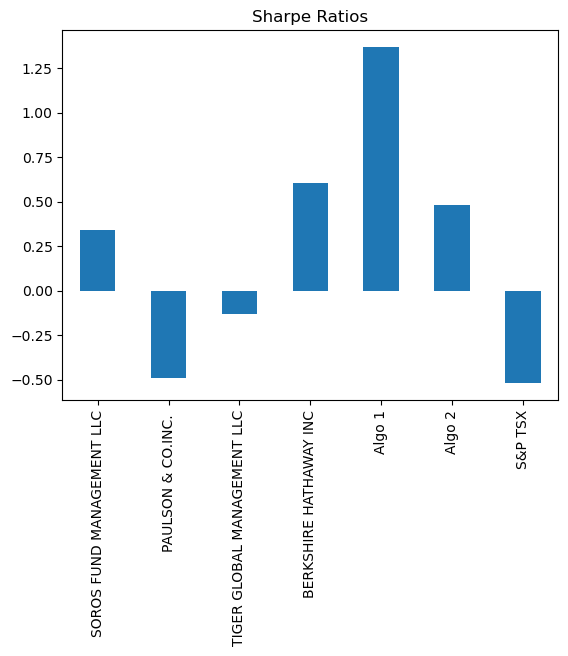

In [40]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 has the highest Sharpe ratio (1.369589), indicating a higher risk-adjusted return compared to the other portfolios. Algo 2 has a positive Sharpe ratio (0.484334). However, it has a lower Sharpe ratio than Algo 1. Algo 2 also outperforms the market but underperforms and Berkshire Hathaway Inc.
Therefore, Algo 1 outperforms both the market (S&P 500) and the whale portfolio, while Algo 2 also outperforms the market but underperforms Algo 1 and Berkshire Hathaway Inc.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [42]:
# Reading data from 1st stock - ABBVIE INC.
# Set the file paths
abbvie_data = Path("/Users/eyva/Desktop/Repos/Portfolio_perfomance_assessment/Resources/ABBV_ABBVIE INC._historical.csv")

# Reading
abbvie_df = pd.read_csv(abbvie_data, index_col="Trade Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows
abbvie_df.head(2)


,Symbol,NOCP
Trade Date,,
2022-06-30,ABBV,153.16
2022-07-01,ABBV,153.80


In [43]:
# Reading data from 2nd stock - Abbott Laboratories
# Set the file paths
abbott_data = Path("/Users/eyva/Desktop/Repos/Portfolio_perfomance_assessment/Resources/ABT_Abbott Laboratories_historical.csv")

# Reading
abbott_df = pd.read_csv(abbott_data, index_col="Trade Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows
abbott_df.head(2)

,Symbol,NOCP
Trade Date,,
2022-06-30,ABT,108.65
2022-07-01,ABT,110.22


In [44]:
# Reading data from 3rd stock -  Pfizer Inc.
# Set the file paths
pfizer_data = Path("/Users/eyva/Desktop/Repos/Portfolio_perfomance_assessment/Resources/PFE_Pfizer Inc._historical.csv")

# Reading
pfizer_df = pd.read_csv(pfizer_data, index_col="Trade Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows
pfizer_df.head(2)

,Symbol,NOCP
Trade Date,,
2022-06-30,PFE,52.43
2022-07-01,PFE,52.31


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!